### Import important packages like pandas and numpy

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# This is my change

### store your directory and file names in a variable for code reusability

In [2]:
location='C://Backup//DataPartition//RIT Course Work//BANA//Assignment 1//'
file1='NCHS_-_Leading_Causes_of_Death__United_States.csv'
file2='nst-est2018-01.xlsx'

### reading the file into data frames

In [4]:
df1=pd.read_csv(location+file1)
df2=pd.read_excel(location+file2,header=None)

### Exploring and viewing the data

In [5]:
df1.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [6]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,table with row headers in column A and column ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
4,United States,308745538,308758105,309326085,311580009.0,313874218.0,316057727.0,318386421.0,320742673.0,323071342.0,325147121.0,327167434.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10296 non-null object
Cause Name                 10296 non-null object
State                      10296 non-null object
Deaths                     10296 non-null int64
Age-adjusted Death Rate    10296 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.8+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
0     65 non-null object
1     59 non-null object
2     58 non-null object
3     59 non-null object
4     58 non-null float64
5     58 non-null float64
6     58 non-null float64
7     58 non-null float64
8     58 non-null float64
9     58 non-null float64
10    58 non-null float64
11    58 non-null float64
dtypes: float64(8), object(4)
memory usage: 6.4+ KB


### Drop first two cells for data cleaning purposes

In [14]:
## Pull the column title "Geographic Area"
label = df2.iloc[2,0]

## Pull the remainder row containing the header
headers = df2.iloc[3:4]

## Pull the values within the rows
headers.values

## Create new column header array
newColumnHeaders = []

## Add the first value to it
newColumnHeaders.append(label)

## Add the remainder values to it
for x in headers.values[0]:
    if isinstance(x, float):
        if np.isnan(x):
            continue
        newColumnHeaders.append(int(x))
        continue
    newColumnHeaders.append(x)

newColumnHeaders

## Make the clean data frame with the values from United States to Puerto Rico
cleanDF = pd.DataFrame(df2.iloc[4:-5])
## Assign the new column headers
cleanDF.columns = newColumnHeaders
## Get rid of row number 60 as it was just an empty row
cleanDF.dropna()


,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018
4,United States,308745538,308758105,309326085,311580009.0,313874218.0,316057727.0,318386421.0,320742673.0,323071342.0,325147121.0,327167434.0
5,Northeast,55317240,55318430,55380645,55600532.0,55776729.0,55907823.0,56015864.0,56047587.0,56058789.0,56072676.0,56111079.0
6,Midwest,66927001,66929743,66974749,67152631.0,67336937.0,67564135.0,67752238.0,67869139.0,67996917.0,68156035.0,68308744.0
7,South,114555744,114563045,114867066,116039399.0,117271075.0,118393244.0,119657737.0,121037542.0,122401186.0,123598424.0,124753948.0
8,West,71945553,71946887,72103625,72787447.0,73489477.0,74192525.0,74960582.0,75788405.0,76614450.0,77319986.0,77993663.0
9,.Alabama,4779736,4780138,4785448,4798834.0,4815564.0,4830460.0,4842481.0,4853160.0,4864745.0,4875120.0,4887871.0
10,.Alaska,710231,710249,713906,722038.0,730399.0,737045.0,736307.0,737547.0,741504.0,739786.0,737438.0
11,.Arizona,6392017,6392288,6407774,6473497.0,6556629.0,6634999.0,6733840.0,6833596.0,6945452.0,7048876.0,7171646.0
12,.Arkansas,2915918,2916028,2921978,2940407.0,2952109.0,2959549.0,2967726.0,2978407.0,2990410.0,3002997.0,3013825.0
13,.California,37253956,37254523,37320903,37641823.0,37960782.0,38280824.0,38625139.0,38953142.0,39209127.0,39399349.0,39557045.0


Use markdown to add your important comments 
to create a markdown,add a cell above comment
change the option from code to markdown
use # for heading 1, ## for heading two and so on...(one space after #)
## please delete this before submitting

# Question1 Sub question 4


## What are top 4 leading causes of death?

In [44]:
# df1
# df1.columns

# ### Get the four leading causes of Deaths

## Should it be by year? should we just aggregate all deaths specific to a cause name?

# ### Get the Years column sorted
df1_sorted_by_year = df1.sort_values(by=['Year'])

df1_sorted_by_year # 10296 rows

# ### Get all the unique causes: 11 Unique Causes (936 each)
df1_sorted_by_year.iloc[0:, 1].value_counts()
"""
All Causes                                                               936
Alzheimer's disease (G30)                                                936
Chronic lower respiratory diseases (J40-J47)                             936
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    936
Malignant neoplasms (C00-C97)                                            936
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                     936
Diabetes mellitus (E10-E14)                                              936
Cerebrovascular diseases (I60-I69)                                       936
Influenza and pneumonia (J09-J18)                                        936
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     936
Diseases of heart (I00-I09,I11,I13,I20-I51)                              936
Name: 113 Cause Name, dtype: int64
"""

## Display only these three columns 
df1_causes_and_death = df1_sorted_by_year[['113 Cause Name', 'Cause Name', 'Deaths']]
# df1_causes_and_death

#####################################################################
### The Below was used to help understand one type of cause of death

## Find the unique count of the causes
# df1_causes_and_death.iloc[0:, 1].value_counts()


## Get the deaths for a specific cause name
# clrd_deaths = df1_causes_and_death[df1_causes_and_death.iloc[0:,1].isin(['CLRD'])]
# clrd_deaths

## Get the cumulative count: 4869452 Deaths by CLRD
# clrd_deaths.iloc[0:,2].agg('sum')
#####################################################################

## Use pivot table to help aggregate all the causes and summing their deaths
total_deaths_per_causes = pd.pivot_table(df1_causes_and_death,
                                         values='Deaths',
                                         index=['Cause Name'],
                                         #columns=['113 Cause Name'],
                                         aggfunc=np.sum)

#total_deaths_per_causes

## Sort the pivot table in descending order
deaths_descending = total_deaths_per_causes.sort_values(by=['Deaths'], ascending=False)
# deaths_descending

## Display the top 4
top_4_deaths = deaths_descending.iloc[0:4]
top_4_deaths

,Deaths
Cause Name,
All causes,89830132
Heart disease,23150366
Cancer,20489072
Stroke,5160280


# Question1 Sub question 3


## Do individual states show the same four leading causes of death??

In [85]:
df1.head()
 
##Picking up data only for deaths,states and cause name

df1_deaths_states_all=df1.loc[:,['Deaths','State','Cause Name']]

#Maximum values of death group by state and cause name


df1_deaths_states_all.sort_values(by='Deaths',ascending=False)






,Deaths,State,Cause Name
9601,2744248,United States,All causes
9622,2712630,United States,All causes
9585,2626418,United States,All causes
9616,2596993,United States,All causes
9620,2543279,United States,All causes
...,...,...,...
779,24,Alaska,Alzheimer's disease
103,23,Alaska,Kidney disease
3,23,District of Columbia,Suicide
82,21,Alaska,Kidney disease


# Question 1 Part 1
## Are Americans facing increasing, decreasing, or steady likelihood of death?

In [31]:
df1.head()

df1_likelihood=df1.groupby('Year').agg('sum')
df1_likelihood


,Deaths,Age-adjusted Death Rate
Year,,
1999,8594450,82092.1
2000,8611090,81348.2
2001,8631566,80287.5
2002,8724520,80067.7
2003,8720806,78948.7
2004,8523496,75728.2
2005,8675996,75942.4
2006,8561880,73598.8
2007,8540026,72093.0


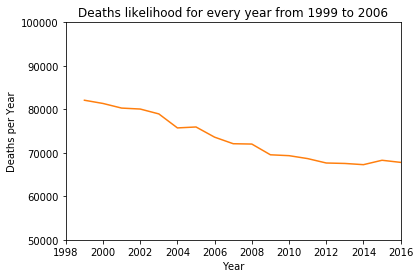

In [71]:

plt.figure()
plt.ylabel("Deaths per Year")
plt.xlim(1998,2016)
plt.ylim(50000,100000)
plt.xlabel("Year")
plt.title("Deaths likelihood for every year from 1999 to 2006")

plt.plot(df1_likelihood.index,df1_likelihood.values)


plt.show()
